In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns


In [5]:
data = pd.read_excel("Concrete_Data.xls")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [9]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

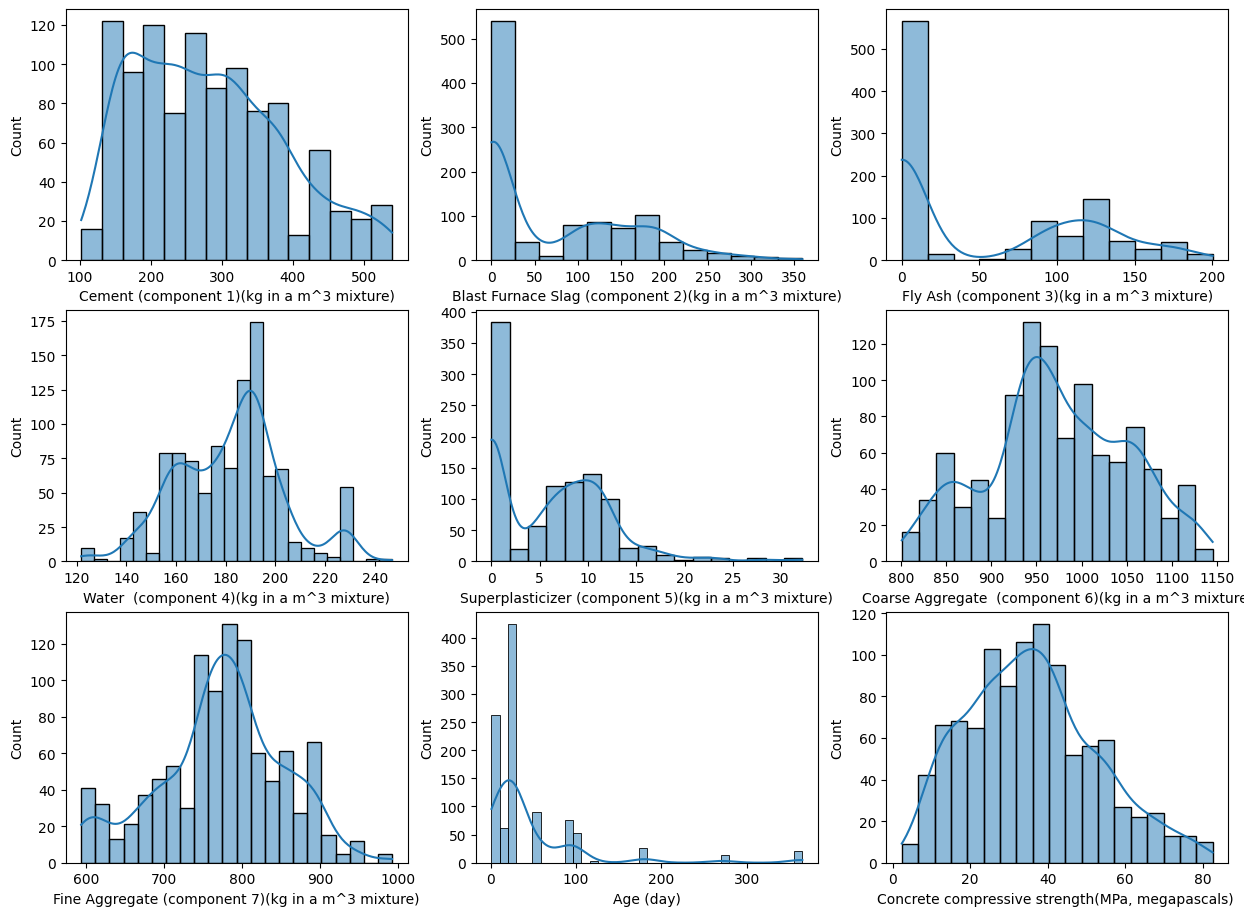

In [16]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(data[column], kde=True)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

## Data Transformation

In [17]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [18]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [19]:
# before doing the log transformation, 
#let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0
import numpy as np
for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

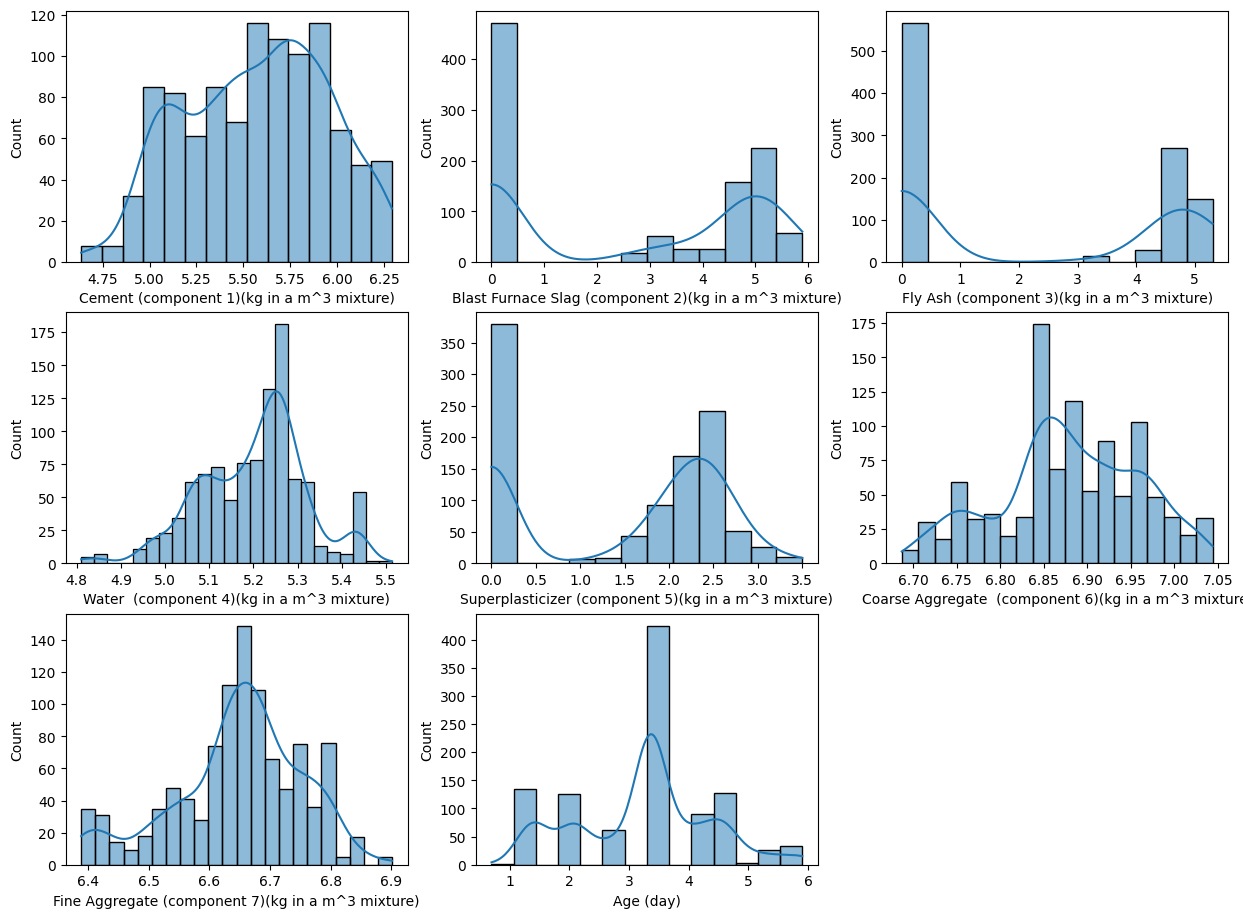

In [20]:
import numpy as np

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(X[column],kde=True)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

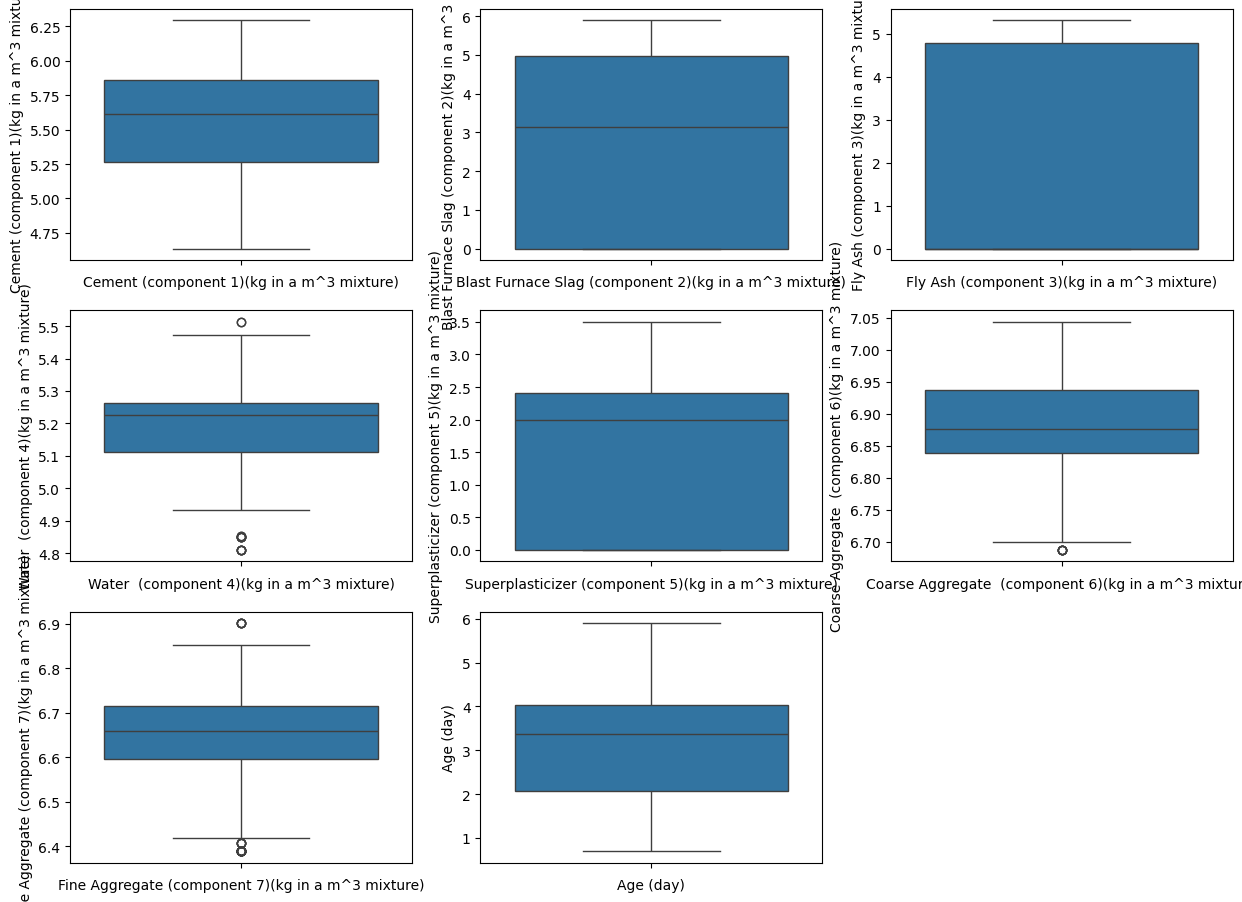

In [21]:
# let's check for outliers 

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

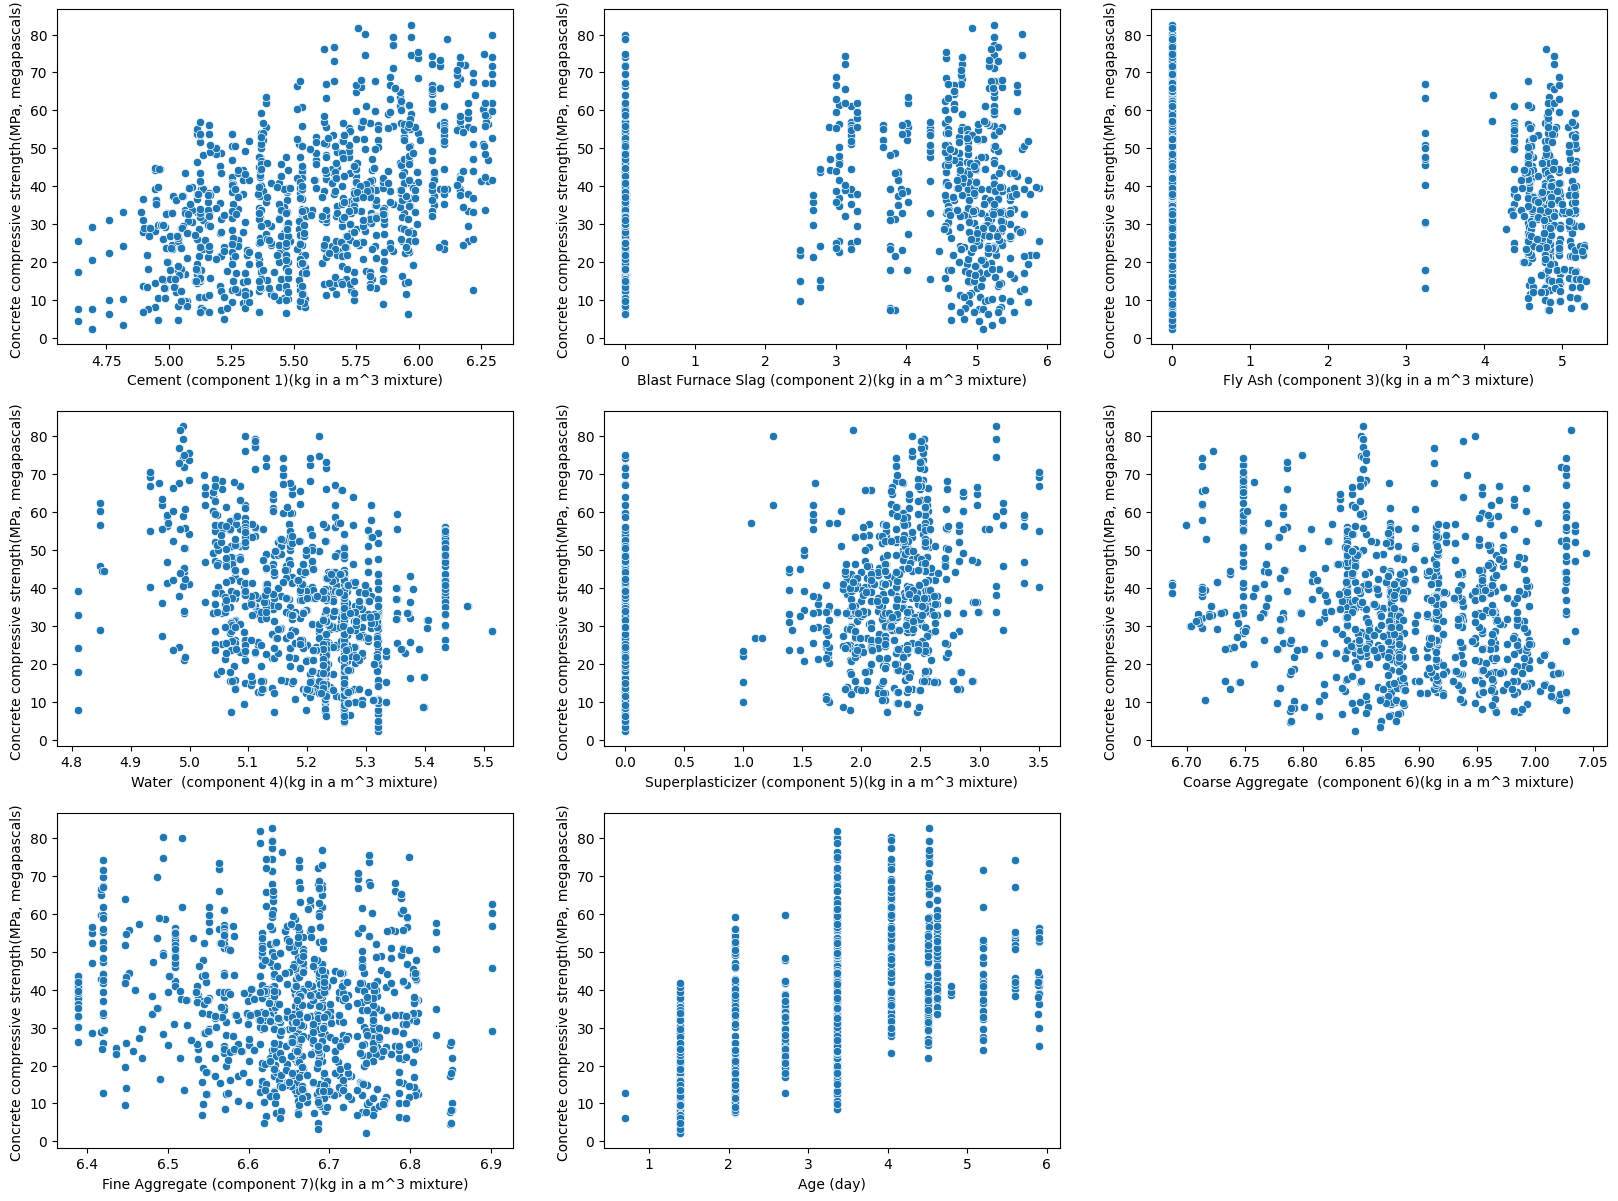

In [25]:
# let's check how our features are related to the target column
plot.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4, 3, plotnumber)
    sns.scatterplot(x=X[column], y=y)  # Pass X[column] as x-axis data and y as y-axis data
    plot.xlabel(column, fontsize=10)
    plotnumber += 1

plot.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also Random forest regressor and compare our results from both the models.

In [26]:
# let's check for correaltion using heatmap

<Axes: >

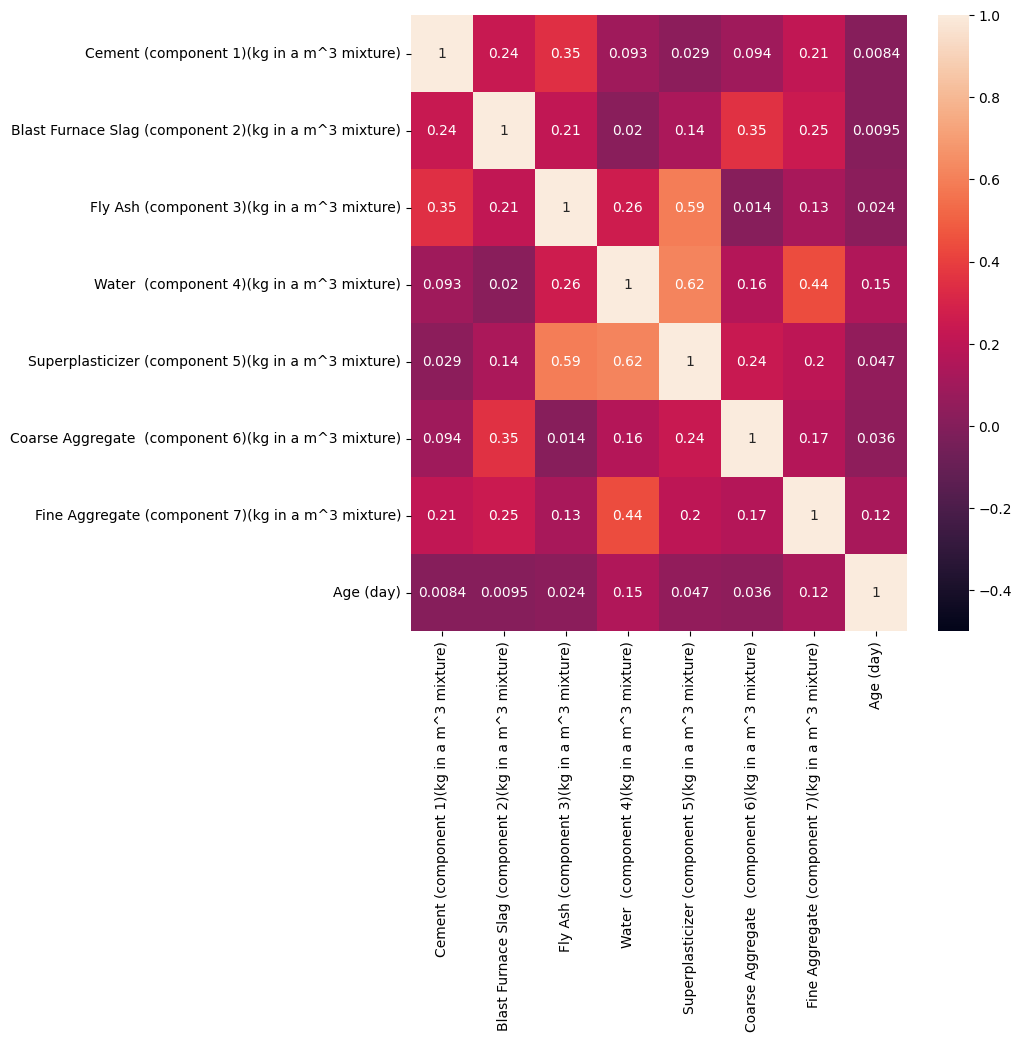

In [27]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True)


Great! none of our columns seem to be correlated.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scalar = StandardScaler()

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1 / 3, random_state=36,)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [32]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
377,0.960235,-1.077416,-0.927142,1.461699,-1.309462,0.422971,-0.080896,0.733205
520,0.226739,0.074452,1.152025,-0.063084,0.320583,-1.710492,0.392817,-1.637907
950,0.591182,-1.077416,1.142764,0.827112,0.846976,-2.315844,0.290598,0.130105
51,-0.822590,1.104634,-0.927142,1.971152,-1.309462,-0.475799,-1.318071,1.764422
724,0.455642,-1.077416,-0.927142,0.526096,-1.309462,0.525535,0.733587,1.150717
...,...,...,...,...,...,...,...,...
799,1.907201,-1.077416,-0.927142,-0.349520,-1.309462,1.812774,-2.169721,-1.637907
963,-1.438723,1.195682,-0.927142,-0.310763,0.924849,1.195265,-1.249689,0.130105
583,-0.552804,1.315243,-0.927142,0.245696,-1.309462,0.097550,-1.046029,0.130105
567,-0.643528,0.965672,-0.927142,0.245696,-1.309462,1.273482,-0.119429,-1.019284


In [33]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
945,-1.660063,0.978814,1.074523,0.883007,0.600297,-0.720495,-0.197566,0.103867
188,-0.441391,-1.050507,1.046791,0.408879,0.228503,-0.039058,1.146708,1.233730
529,0.821150,0.191473,1.204810,-1.320189,0.901633,-0.369026,0.373276,0.715741
917,-1.512215,1.093087,-0.887777,-0.442949,-0.288331,0.381316,0.682194,0.103867
117,0.462066,1.259928,-0.887777,-0.225249,0.715543,0.956923,-2.137048,0.103867
...,...,...,...,...,...,...,...,...
986,0.097179,0.883266,0.977050,1.267716,0.750775,-0.886086,-1.156662,0.103867
936,-0.274578,0.827292,0.920958,2.638249,0.442941,-1.616721,-0.943922,0.103867
926,-1.274678,1.176068,1.268197,0.953895,0.833034,-2.110647,-1.152551,0.103867
610,-0.284604,-1.050507,-0.887777,0.571642,-1.236505,-0.027117,1.302585,2.399529
